In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.drop(columns = ['Serial No.'],inplace = True)

In [6]:
X=df.iloc[:, 0:-1]
y =df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [10]:
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

2022-10-11 18:58:29.839600: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [13]:
history  = model.fit(X_train_scaled,y_train,epochs = 120,validation_split=0.2)

2022-10-11 18:58:30.088214: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/120
10/10 [==============================] - 1s 18ms/step - loss: 0.1227 - val_loss: 0.0979
Epoch 2/120
10/10 [==============================] - 0s 6ms/step - loss: 0.0791 - val_loss: 0.0650
Epoch 3/120
10/10 [==============================] - 0s 5ms/step - loss: 0.0606 - val_loss: 0.0533
Epoch 4/120
10/10 [==============================] - 0s 6ms/step - loss: 0.0542 - val_loss: 0.0489
Epoch 5/120
10/10 [==============================] - 0s 5ms/step - loss: 0.0498 - val_loss: 0.0445
Epoch 6/120
10/10 [==============================] - 0s 6ms/step - loss: 0.0447 - val_loss: 0.0405
Epoch 7/120
10/10 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.0368
Epoch 8/120
10/10 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.0332
Epoch 9/120
10/10 [==============================] - 0s 6ms/step - loss: 0.0322 - val_loss: 0.0296
Epoch 10/120
10/10 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.0263
Epoch 11

In [14]:
y_pred = model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8130166796848336

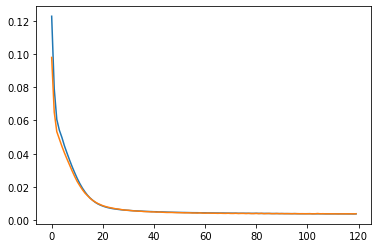

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])